In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import seaborn as sns

In [2]:
j1939 = pd.read_csv('../data/J1939Faults.csv')

C:\Users\sarei\AppData\Local\Temp\ipykernel_2712\3023534108.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  j1939 = pd.read_csv('../data/J1939Faults.csv')


In [3]:
onboard = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv')

In [4]:
onboard = onboard.pivot(index = 'FaultId',
                        columns = 'Name',
                        values = 'Value')

In [5]:
both = j1939.merge(onboard,
                  left_on = 'RecordID',
                  right_on = 'FaultId')

In [6]:
both

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,NaN,False,78.8,1023,True,NaN,0,3276.75,NaN,0
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
3,4,990370,2015-02-21 11:35:33.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,NaN,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN
4,5,990416,2015-02-21 11:39:41.000,NaN,NaN,22281684P01*22357957P01*22362082P01*,13063430,0USA13_13_0415_2238A,VOLVO,0,...,NaN,NaN,NaN,16639,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,1248454,123904424,2020-03-06 14:00:26.000,Low (Severity Low) Catalyst Tank Level,NaN,04384413*22383729*082218154102*60701732*G1*BGT*,80156139,6X1u17D1500000000,CMMNS,0,...,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN
1187331,1248455,123905139,2020-03-06 14:04:23.000,Condition Exists Engine Protection Torque Derate,NaN,04358814*06099720*030816202706*09400153*G1*BDR*,79932020,6X1u13D1500000000,CMMNS,0,...,32,True,98.6,18431,False,NaN,65.01096,NaN,73.2,7.83
1187332,1248456,123905996,2020-03-06 14:13:38.000,Abnormal Rate of Change Aftertreatment 1 Intak...,NaN,05317106*05100987*050719120655*09401585*G1*BDR*,79880653,6X1u13D1500000000,CMMNS,0,...,NaN,True,91.4,17407,NaN,NaN,66.5741,NaN,100,6.96
1187333,1248457,123906113,2020-03-06 14:14:13.000,Low (Severity Medium) Engine Coolant Level,NaN,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,...,NaN,True,100.4,1023,False,NaN,11.84489,14.1,100,1.74


In [7]:
both['geometry'] = both.apply(lambda x: Point((x.Longitude,
                                               x.Latitude)),
                              axis=1)

both.head(3)

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,geometry
0,1,990349,2015-02-21 10:47:13.000,Low (Severity Low) Engine Coolant Level,NaN,unknown,unknown,unknown,unknown,0,...,False,78.8,1023,True,NaN,0,3276.75,NaN,0,POINT (-84.626851 38.857638)
1,2,990360,2015-02-21 11:34:34.000,NaN,NaN,unknown,unknown,unknown,unknown,11,...,True,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-84.626851 38.857638)
2,3,990364,2015-02-21 11:35:31.000,Incorrect Data Steering Wheel Angle,NaN,unknown,unknown,unknown,unknown,11,...,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.76736099999999 41.42125)


In [8]:
both_geo = gpd.GeoDataFrame(both, 
                           crs = 'EPSG:4326', 
                           geometry = both['geometry'])

In [9]:
both_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
both_geo_derates = both_geo[(both_geo['spn'] == 5246) & 
                            (both_geo['fmi'] == 0)]

In [11]:
both_geo_derates['LocationTimeStamp'] = pd.to_datetime(both_geo_derates['LocationTimeStamp'])

C:\Users\sarei\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [12]:
both_geo_derates['time_of_year'] = both_geo_derates['LocationTimeStamp'].dt.month % 12 // 3 + 1

C:\Users\sarei\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [13]:
both_geo_derates['time_of_year'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
area_center =  [36.174465, -86.767960]

map_derates = folium.Map(location = area_center, zoom_start = 5)

def add_marker(row):
    if row['time_of_year'] == 1:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='blue',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates)

    elif row['time_of_year'] == 2:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='green',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates)
        
    elif row['time_of_year'] == 3:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='yellow',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates)

    else:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='orange',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates)

    
#map_derates.save('../maps/map_derates.html')

both_geo_derates.apply(add_marker, axis=1)

#display our map
map_derates

In [15]:
both_geo_derates

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,geometry,time_of_year
45,46,990931,2015-02-21 12:10:51.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-86.43342 36.06597),1
1918,1919,1007751,2015-02-22 19:44:55.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-86.43481 36.06620),1
2058,2059,1010486,2015-02-23 04:00:21.000,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,...,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-86.43454 36.06667),1
2089,2090,1011009,2015-02-23 05:05:44.000,NaN,NaN,05290170*03015749*051914190353*09400015*G1*BDR*,79642446,6X1u13D1500000000,CMMNS,0,...,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.08778 40.73301),1
2971,2972,1026305,2015-02-23 15:54:22.000,NaN,NaN,unknown,unknown,unknown,unknown,0,...,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-81.89708 28.07736),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181701,1241842,120905766,2020-02-13 13:33:36.000,NaN,NaN,05317106*05088449*051718172255*09401583*G1*BDR*,79875897,6X1u13D1500000000,CMMNS,0,...,NaN,18431,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-83.17495 36.19514),1
1181717,1241858,120910417,2020-02-13 14:01:40.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,...,NaN,1023,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-81.39565 35.70810),1
1183032,1244156,121610128,2020-02-19 07:02:33.000,NaN,NaN,05317106*05005224*051718172255*09401583*G1*BDR*,79845785,6X1u13D1500000000,CMMNS,0,...,41,22527,NaN,NaN,0,NaN,100,0.58,POINT (-86.43412 36.06704),1
1184330,1245454,122305096,2020-02-24 15:27:26.000,NaN,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,...,55.4,5119,True,NaN,0,NaN,100,0,POINT (-86.43472 36.06662),1


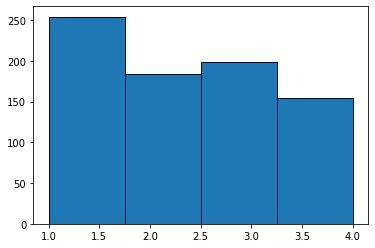

In [16]:
plt.hist(both_geo_derates['time_of_year'],
         bins = 4,
        edgecolor = 'black');

In [17]:
both_geo_derates.groupby('time_of_year').count()['RecordID']

time_of_year
1    254
2    184
3    198
4    154
Name: RecordID, dtype: int64

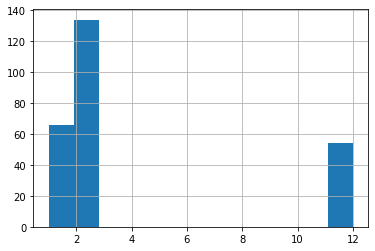

In [18]:
both_geo_derates[both_geo_derates['time_of_year'] == 1]['LocationTimeStamp'].dt.month.hist(bins = 12);

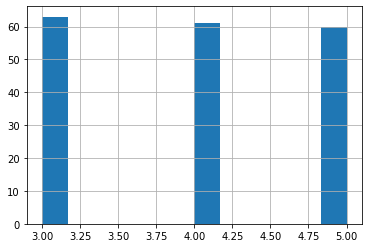

In [19]:
both_geo_derates[both_geo_derates['time_of_year'] == 2]['LocationTimeStamp'].dt.month.hist(bins = 12);

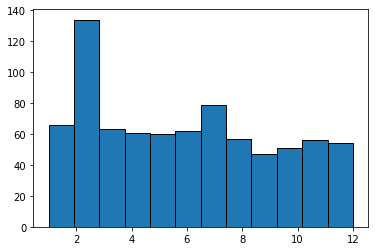

In [20]:
plt.hist(both_geo_derates['LocationTimeStamp'].dt.month,
         bins = 12,
         edgecolor = 'black');

In [21]:
both_geo_derates['location_month'] = both_geo_derates['LocationTimeStamp'].dt.month

C:\Users\sarei\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [22]:
area_center =  [36.174465, -86.767960]


map_derates_month = folium.Map(location = area_center, zoom_start = 5)

def add_marker_month(row):
    if row['location_month'] == 1:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='blue',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)

    elif row['location_month'] == 2:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='red',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
        
    elif row['location_month'] == 3:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='black',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
        
    elif row['location_month'] == 4:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='yellow',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
        
    elif row['location_month'] == 5:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='purple',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
        
    elif row['location_month'] == 6:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='lightblue',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
    
    elif row['location_month'] == 7:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='moccasin',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
        
    elif row['location_month'] == 8:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='lightcoral',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
        
    elif row['location_month'] == 9:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='pink',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
        
    elif row['location_month'] == 10:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='sienna',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)
        
    elif row['location_month'] == 11:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='orange',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)

    else:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='cyan',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_month)

    
#map_derates.save('../maps/map_derates.html')

both_geo_derates.apply(add_marker_month, axis=1)

#display our map
map_derates_month

In [23]:
area_center =  [36.174465, -86.767960]


map_derates_feb = folium.Map(location = area_center, zoom_start = 5)

def add_marker_feb(row):
    if row['location_month'] == 2:
        marker=folium.CircleMarker([row['Latitude'],
                                    row['Longitude']],
                                   radius=5,
                                   color='red',
                                   popup=row['LocationTimeStamp'])
        marker.add_to(map_derates_feb)
    
#map_derates.save('../maps/map_derates.html')

both_geo_derates.apply(add_marker_feb, axis=1)

#display our map
map_derates_feb

In [24]:
both_geo_derates['location_year'] = both_geo_derates['LocationTimeStamp'].dt.year

C:\Users\sarei\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


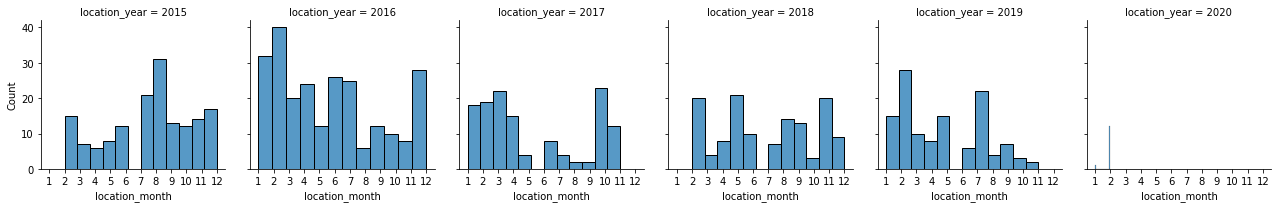

In [42]:
g = sns.FacetGrid(both_geo_derates,
              col = 'location_year')

g.map_dataframe(sns.histplot, x = 'location_month', bins = 12)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]);

In [44]:
both_geo_derates[both_geo_derates['location_year'] == 2018]['location_month'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [46]:
both_geo_derates[both_geo_derates['location_year'] == 2020]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,...,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,geometry,time_of_year,location_month,location_year
1177700,1237841,119019219,2011-01-01 00:03:23.000,NaN,NaN,04384413*22115617*090617144354*60701715*G1*BGT*,80035307,6X1u17D1500000000,CMMNS,0,...,True,NaN,0,NaN,100,0,POINT (-84.09667 33.25903),1,1,2020
1178580,1238721,119578297,2020-02-03 16:34:21.000,NaN,NaN,04384413*22246857*121817205924*60701721*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,...,True,NaN,0,NaN,100,0.58,POINT (-86.43477 36.06713),1,2,2020
1178583,1238724,119579957,2020-02-03 16:47:40.000,NaN,NaN,04384413*22246857*121817205924*60701721*G1*BGT*,80092582,6X1u17D1500000000,CMMNS,0,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-86.43477 36.06657),1,2,2020
1179414,1239555,119959276,2020-02-06 07:45:08.000,NaN,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,...,True,NaN,0,NaN,100,0.29,POINT (-83.82301 35.94361),1,2,2020
1179423,1239564,119961467,2020-02-06 08:03:09.000,NaN,NaN,04358814*06005963*051718174436*09401683*G1*BDR*,79897320,6X1u13D1500000000,CMMNS,0,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-83.82324 35.94347),1,2,2020
1181165,1241306,120714351,2020-02-12 09:19:20.000,NaN,NaN,unknown,unknown,unknown,unknown,0,...,NaN,NaN,0,NaN,100,0,POINT (-83.17472 36.19514),1,2,2020
1181662,1241803,120891888,2020-02-13 12:15:53.000,NaN,NaN,unknown,unknown,unknown,unknown,0,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-83.17467 36.19509),1,2,2020
1181700,1241841,120905759,2020-02-13 13:32:39.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,...,True,NaN,0,NaN,100,0.58,POINT (-81.39704 35.70727),1,2,2020
1181701,1241842,120905766,2020-02-13 13:33:36.000,NaN,NaN,05317106*05088449*051718172255*09401583*G1*BDR*,79875897,6X1u13D1500000000,CMMNS,0,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-83.17495 36.19514),1,2,2020
1181717,1241858,120910417,2020-02-13 14:01:40.000,NaN,NaN,04358814*06026985*051718174436*09401683*G1*BDR*,79903054,6X1u13D1500000000,CMMNS,0,...,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-81.39565 35.70810),1,2,2020


In [52]:
seasons = {
    1: 'winter',
    2: 'spring',
    3: 'summer',
    4: 'fall'
}

both_geo_derates = both_geo_derates.replace({'time_of_year': seasons})

In [60]:
both_geo_derates.groupby(['location_year','time_of_year'])['RecordID'].count()

location_year  time_of_year
2015           fall             39
               spring           21
               summer           64
               winter           32
2016           fall             30
               spring           56
               summer           57
               winter          100
2017           fall             37
               spring           41
               summer           14
               winter           37
2018           fall             36
               spring           33
               summer           31
               winter           29
2019           fall             12
               spring           33
               summer           32
               winter           43
2020           winter           13
Name: RecordID, dtype: int64